# Challenge: What Test to use?

In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [39]:
################# Imports #########################

# Basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Statistical Tests
from scipy import stats
from statsmodels.stats.weightstats import ttest_ind

In [2]:
################ Bring in Data #####################

data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [3]:
# Year here is listed as the rounds. 6 is 2012 and 7 is 2014
data['year'].value_counts()

7    4297
6    4297
Name: year, dtype: int64

In [5]:
####### Normality Test #############
def normal_test(data):
    k2, p = stats.normaltest(data)
    alpha = 5e-3
    print("p = {:g}".format(p))

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Probably not a normal distribution")
    else:
        print("Probably a normal distribution")

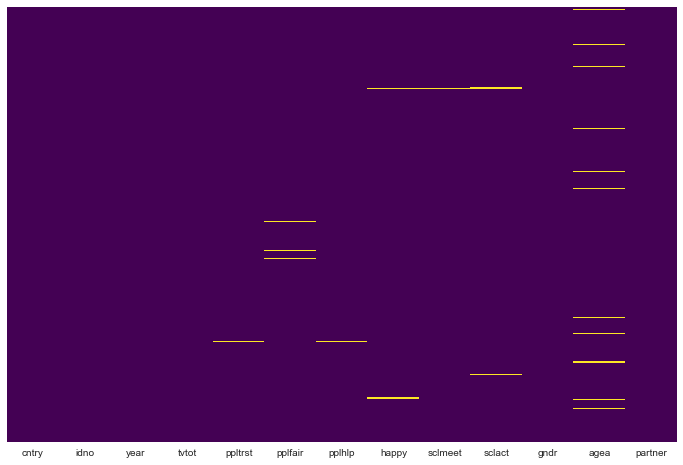

In [18]:
# Is there any missing data?
plt.figure(figsize=(12,8))
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

1. Null Hypothesis - there is no difference in the means of trust measure from 2012 to 2014.
2. Alternative Hypothesis - mean of trust measure will reduce from 2012 to 2014.

This is a one tailed test. However, we run the risk of missing the effect if people became more trusting.

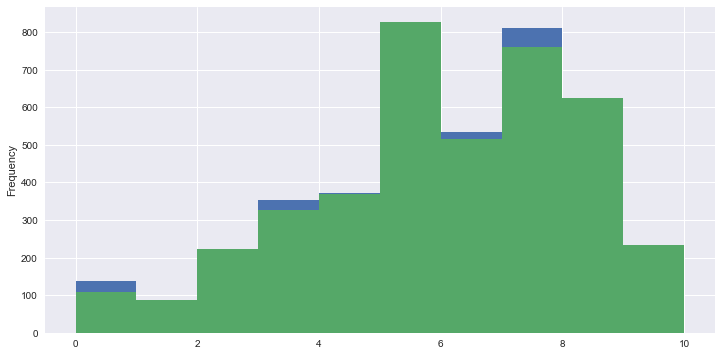

In [33]:
# Will check to see what if this factor is normal

plt.figure(figsize=(12,6))
#Fiq1`rst need to separate the data
data_2012 = data[data['year']==6].dropna()
data_2014 = data[data['year']==7].dropna()

# Visualize it
data_2012['ppltrst'].plot(kind='hist')
data_2014['ppltrst'].plot(kind='hist')

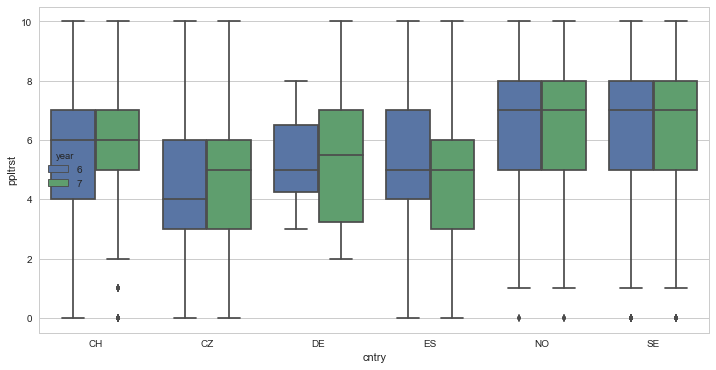

In [34]:
# Box Plot

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(x="cntry", y="ppltrst", hue='year', data=data)

In [20]:
# Check normality for all the data.
normal_test(data_2012['ppltrst'])

p = 1.06741e-39
Probably not a normal distribution


In [38]:
# Assuming that it is a normal distribution, lets do the t-tests. Since we are looking at a specific direction, will do a one-tailed t-test.
# p value is greater than 0.05 so we cannot reject the null that there is no difference between the groups.

#Sci-py
print(stats.ttest_ind(data_2012['ppltrst'], data_2014['ppltrst']))

Ttest_indResult(statistic=0.14436850819698421, pvalue=0.88521305488891056)


In [44]:
# Stats models - Use this because could do the one side test
print(ttest_ind(data_2012['ppltrst'], data_2014['ppltrst'], alternative='larger'))

(0.1443685081969841, 0.44260652744445528, 8145.0)


In [22]:
# Lets do a non parametric test since the data is probably not normally distributed
print(stats.mannwhitneyu(data_2012['ppltrst'], data_2014['ppltrst']))

MannwhitneyuResult(statistic=8260446.0, pvalue=0.36491017380764701)


In [27]:
# Look at the test by country for t-test
for country in data['cntry'].unique().tolist():
    x = data_2012[data['cntry']==country]['ppltrst']
    y = data_2014[data['cntry']==country]['ppltrst']
    print(country)
    print(stats.ttest_ind(x, y))

CH
Ttest_indResult(statistic=-0.71569747922178162, pvalue=0.47429160029094908)
CZ
Ttest_indResult(statistic=0.34075433231518504, pvalue=0.73334793159099765)
DE
Ttest_indResult(statistic=-0.34662131701252841, pvalue=0.73177642737857318)
ES
Ttest_indResult(statistic=2.1000674443244907, pvalue=0.035832041935213631)
NO
Ttest_indResult(statistic=0.51192241811452277, pvalue=0.60878502181319782)
SE
Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.042829363452229798)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [28]:
# Look at the test by country for t-test (Scipy)
for country in data['cntry'].unique().tolist():
    x = data_2012[data['cntry']==country]['ppltrst']
    y = data_2014[data['cntry']==country]['ppltrst']
    print(country)
    print(stats.stats.mannwhitneyu(x, y))

CH
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)
CZ
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)
DE
MannwhitneyuResult(statistic=84.0, pvalue=0.37414178719449009)
ES
MannwhitneyuResult(statistic=617480.0, pvalue=0.0061948210527193069)
NO
MannwhitneyuResult(statistic=248611.0, pvalue=0.32466077815437411)
SE
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [45]:
# Look at the test by country for t-test (Statsmodels)
for country in data['cntry'].unique().tolist():
    x = data_2012[data['cntry']==country]['ppltrst']
    y = data_2014[data['cntry']==country]['ppltrst']
    print(country)
    print(ttest_ind(x, y, alternative='larger'))

CH
(-0.71569747922178162, 0.76285419985452552, 1473.0)
CZ
(0.34075433231518498, 0.36667396579549882, 1205.0)
DE
(-0.34662131701252841, 0.6341117863107133, 25.0)
ES
(2.1000674443244907, 0.017916020967606815, 2290.0)
NO
(0.51192241811452277, 0.30439251090659891, 1418.0)
SE
(-2.026869805606315, 0.97858531827388517, 1724.0)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [32]:
data.groupby(['cntry', 'year'])['ppltrst'].mean()

cntry  year
CH     6       5.677878
       7       5.751617
CZ     6       4.362519
       7       4.424658
DE     6       5.214286
       7       5.357143
ES     6       5.114592
       7       4.895128
NO     6       6.649315
       7       6.598630
SE     6       6.058499
       7       6.257709
Name: ppltrst, dtype: float64

ES and SE seem to be the only countries where the happiness seem to be significantly different. This is Simspon's paradox where the overall trend doesnt show much difference, but when dive deeper see that certain countries do see a difference. However because doing a one-sided test only ES could reject the null.

### Did people become happier from 2012 to 2014? Compute results for each country in the sample.
x = 2012
y = 2014
Null Hypothesis: x - y = 0
Alternative Hypothesis:  x - y < 0

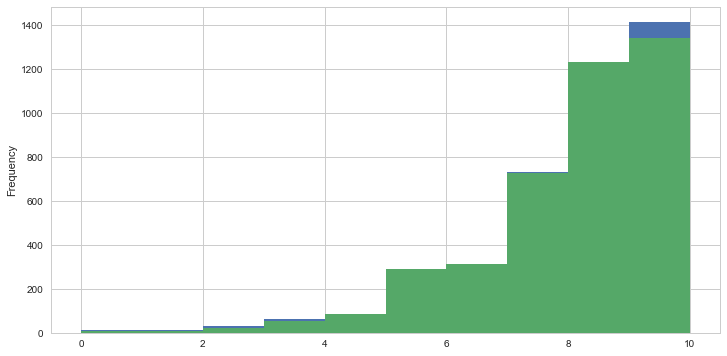

In [46]:
# Will check to see what if this factor is normal

plt.figure(figsize=(12,6))
#First need to separate the data
data_2012 = data[data['year']==6].dropna()
data_2014 = data[data['year']==7].dropna()

# Visualize it
data_2012['happy'].plot(kind='hist')
data_2014['happy'].plot(kind='hist')

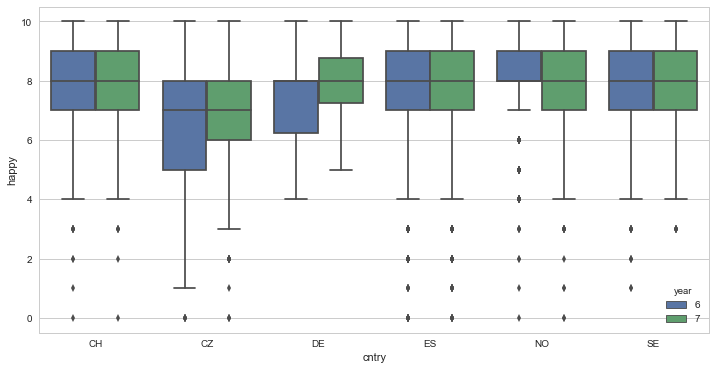

In [47]:
# Box Plot

plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(x="cntry", y="happy", hue='year', data=data)

In [48]:
#Sci-py
print(stats.ttest_ind(data_2012['happy'], data_2014['happy']))

Ttest_indResult(statistic=1.2074597686358974, pvalue=0.22729019122839689)


In [51]:
# Stats models - Use this because could do the one side test
print(ttest_ind(data_2012['happy'], data_2014['happy'], alternative='smaller'))

(1.2074597686358981, 0.88635490438580167, 8145.0)


In [52]:
# Look at the test by country for t-test (Scipy) Non paramteric test
for country in data['cntry'].unique().tolist():
    x = data_2012[data['cntry']==country]['happy']
    y = data_2014[data['cntry']==country]['happy']
    print(country)
    print(stats.stats.mannwhitneyu(x, y))

CH
MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ
MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
DE
MannwhitneyuResult(statistic=73.5, pvalue=0.19313536018324134)
ES
MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO
MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE
MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [55]:
# Look at the test by country for t-test (Statsmodels)
for country in data['cntry'].unique().tolist():
    x = data_2012[data['cntry']==country]['happy']
    y = data_2014[data['cntry']==country]['happy']
    print(country)
    print(ttest_ind(x, y, alternative='smaller'))

CH
(-0.81214248832740121, 0.20842055058850079, 1473.0)
CZ
(-1.1592536826704614, 0.12329122910250123, 1205.0)
DE
(-0.96631754122855895, 0.17157045643635366, 25.0)
ES
(1.3750588408504654, 0.91537614314791305, 2290.0)
NO
(4.152957205997267, 0.99998261065914773, 1418.0)
SE
(-0.53727902103263936, 0.29557211531361938, 1724.0)


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [56]:
data.groupby(['cntry', 'year'])['happy'].mean()

cntry  year
CH     6       8.088312
       7       8.116429
CZ     6       6.770898
       7       6.914110
DE     6       7.428571
       7       7.857143
ES     6       7.548680
       7       7.419967
NO     6       8.251719
       7       7.915185
SE     6       7.907387
       7       7.946961
Name: happy, dtype: float64

These test shows there is not enough to reject the null hypothesis.

### Who reported watching more TV in 2012, men or women?
Gender: 1 - Male, 2 - Female

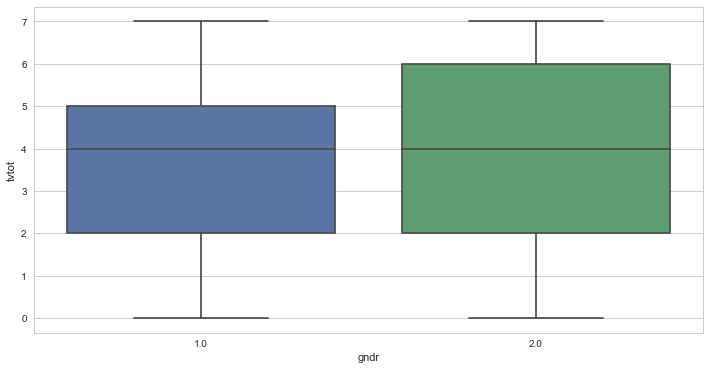

In [58]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.boxplot(x="gndr", y="tvtot", data=data_2012)

In [59]:
# This is to show the means
data_2012.groupby(['gndr'])['tvtot'].mean()

gndr
1.0    3.859230
2.0    3.905352
Name: tvtot, dtype: float64

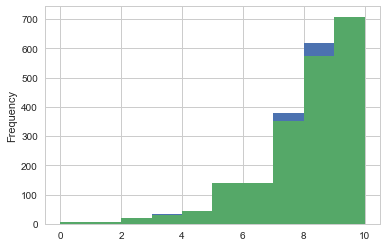

In [61]:
# Visualize it to see if the data is normal and it is not.
data_2012[data_2012['gndr']==1]['happy'].plot(kind='hist')
data_2012[data_2012['gndr']==2]['happy'].plot(kind='hist')

In [62]:
# Since the data is not normal will use a non-parametric test
print(stats.mannwhitneyu(data_2012[data_2012['gndr']==1]['happy'], data_2012[data_2012['gndr']==2]['happy']))

MannwhitneyuResult(statistic=2062821.0, pvalue=0.40673163381751043)


In [64]:
# t test which assumes a normal distribution
print(stats.ttest_ind(data_2012[data_2012['gndr']==1]['happy'], data_2012[data_2012['gndr']==2]['happy']))

Ttest_indResult(statistic=0.71773852361950763, pvalue=0.47295972841278344)


This shows that we cannot reject the null that the 2 groups are different.